In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('batch_19.xlsx')
df

,Sr. No,Name,Place,Post,Salary,Code
0,1,Akshay Bankar,Pune,DS,67000,AK-102
1,2,Arati Banne,Solapur,SE,56000,AB-304
2,3,Dipak Sawant,Kolhapur,Admin,78000,DS-100
3,4,Ganesh Rakate,Sangli,HR,80000,GR-450
4,5,Harshala Gondal,Sangli,DS,45000,HG-232
5,6,Kuldip Muley,Beed,CEO,120000,KM-333
6,7,Piyush Sawant,Mumbai,SE,89000,PS
7,8,Umesh Thorat,Pune,SE,67000,UT-102
8,9,Vaibhav Ladge,Kolhapur,Tester,87000,VL-102
9,10,Supriya Gurav,Pune,SE,90000,SG-100


In [7]:
df.columns

Index(['Sr. No', 'Name', 'Place ', 'Post', 'Salary', 'Code'], dtype='object')

In [10]:
# Placewise student list
list(df.groupby('Place ').Name)

[('Beed',
  5    Kuldip Muley
  Name: Name, dtype: object),
 ('Karad',
  10    Shital Shelar
  Name: Name, dtype: object),
 ('Kolhapur',
  2     Dipak Sawant
  8    Vaibhav Ladge
  Name: Name, dtype: object),
 ('Mumbai',
  6    Piyush Sawant
  Name: Name, dtype: object),
 ('Pune',
  0    Akshay Bankar
  7     Umesh Thorat
  9    Supriya Gurav
  Name: Name, dtype: object),
 ('Sangli',
  3      Ganesh Rakate
  4    Harshala Gondal
  Name: Name, dtype: object),
 ('Solapur',
  1    Arati Banne
  Name: Name, dtype: object)]

In [12]:
df.columns

Index(['Sr. No', 'Name', 'Place ', 'Post', 'Salary', 'Code'], dtype='object')

In [14]:
# in place column we have a space at suffix side ==> plz remove 
df.rename(columns={'Place ':'Place'},inplace=True)

In [15]:
#check column names
df.columns

Index(['Sr. No', 'Name', 'Place', 'Post', 'Salary', 'Code'], dtype='object')

In [17]:
k = [' Sr No ',' Name ',' Post ']
k

[' Sr No ', ' Name ', ' Post ']

In [19]:
s = pd.Series(k)
s

0     Sr No 
1      Name 
2      Post 
dtype: object

In [20]:
s.str.strip()

0    Sr No
1     Name
2     Post
dtype: object

In [22]:
new_s = s.str.replace(' ','')
new_s

0    SrNo
1    Name
2    Post
dtype: object

In [23]:
#convert series to list
new_s.to_list()

['SrNo', 'Name', 'Post']

In [24]:
k

[' Sr No ', ' Name ', ' Post ']

In [25]:
' Avani '.strip()

'Avani'

In [26]:
' Av   ani '.strip()

'Av   ani'

In [27]:
' Av   ani '.replace(' ','')

'Avani'

## Student with highest and lowest salary

In [29]:
df.Salary.max()

120000

In [30]:
df.Salary.min()

45000

In [33]:
g = df.query('Salary == 120000 or Salary == 45000')
g

,Sr. No,Name,Place,Post,Salary,Code
4,5,Harshala Gondal,Sangli,DS,45000,HG-232
5,6,Kuldip Muley,Beed,CEO,120000,KM-333


In [35]:
g.sort_values(by='Salary',ascending=False)

,Sr. No,Name,Place,Post,Salary,Code
5,6,Kuldip Muley,Beed,CEO,120000,KM-333
4,5,Harshala Gondal,Sangli,DS,45000,HG-232


In [40]:
df[df.Salary == df.Salary.max()]

,Sr. No,Name,Place,Post,Salary,Code
5,6,Kuldip Muley,Beed,CEO,120000,KM-333


In [51]:
df[(df.Salary == df.Salary.max()) |(df.Salary == df.Salary.min()) ]

,Sr. No,Name,Place,Post,Salary,Code
4,5,Harshala Gondal,Sangli,DS,45000,HG-232
5,6,Kuldip Muley,Beed,CEO,120000,KM-333


In [42]:
df

,Sr. No,Name,Place,Post,Salary,Code
0,1,Akshay Bankar,Pune,DS,67000,AK-102
1,2,Arati Banne,Solapur,SE,56000,AB-304
2,3,Dipak Sawant,Kolhapur,Admin,78000,DS-100
3,4,Ganesh Rakate,Sangli,HR,80000,GR-450
4,5,Harshala Gondal,Sangli,DS,45000,HG-232
5,6,Kuldip Muley,Beed,CEO,120000,KM-333
6,7,Piyush Sawant,Mumbai,SE,89000,PS
7,8,Umesh Thorat,Pune,SE,67000,UT-102
8,9,Vaibhav Ladge,Kolhapur,Tester,87000,VL-102
9,10,Supriya Gurav,Pune,SE,90000,SG-100


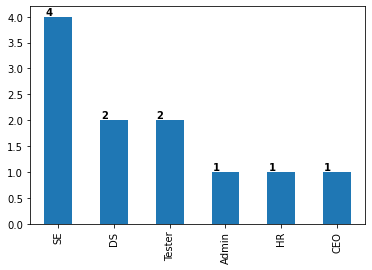

In [48]:
fig, ax = plt.subplots()
df.Post.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.08, p.get_height()),
                va='bottom', ha='center', weight='bold')

## How to add a row from one df to other df

In [55]:
df1 = df.query('Place == "Pune"')
df1

,Sr. No,Name,Place,Post,Salary,Code
0,1,Akshay Bankar,Pune,DS,67000,AK-102
7,8,Umesh Thorat,Pune,SE,67000,UT-102
9,10,Supriya Gurav,Pune,SE,90000,SG-100


In [56]:
df2 = df.query('Place == "Kolhapur"')
df2

,Sr. No,Name,Place,Post,Salary,Code
2,3,Dipak Sawant,Kolhapur,Admin,78000,DS-100
8,9,Vaibhav Ladge,Kolhapur,Tester,87000,VL-102


In [62]:
pd.concat([df1,df2])

,Sr. No,Name,Place,Post,Salary,Code
0,1,Akshay Bankar,Pune,DS,67000,AK-102
7,8,Umesh Thorat,Pune,SE,67000,UT-102
9,10,Supriya Gurav,Pune,SE,90000,SG-100
2,3,Dipak Sawant,Kolhapur,Admin,78000,DS-100
8,9,Vaibhav Ladge,Kolhapur,Tester,87000,VL-102


In [63]:
df1

,Sr. No,Name,Place,Post,Salary,Code
0,1,Akshay Bankar,Pune,DS,67000,AK-102
7,8,Umesh Thorat,Pune,SE,67000,UT-102
9,10,Supriya Gurav,Pune,SE,90000,SG-100


In [65]:
df1.values

array([[1, 'Akshay Bankar', 'Pune', 'DS', 67000, 'AK-102'],
       [8, 'Umesh Thorat', 'Pune', 'SE', 67000, 'UT-102'],
       [10, 'Supriya Gurav', 'Pune', 'SE', 90000, 'SG-100']], dtype=object)

In [83]:
pd.DataFrame(np.insert(df1.values,1,df2,axis=0))

,0,1,2,3,4,5
0,1,Akshay Bankar,Pune,DS,67000,AK-102
1,3,Dipak Sawant,Kolhapur,Admin,78000,DS-100
2,9,Vaibhav Ladge,Kolhapur,Tester,87000,VL-102
3,8,Umesh Thorat,Pune,SE,67000,UT-102
4,10,Supriya Gurav,Pune,SE,90000,SG-100


In [1]:
 0"df1

SyntaxError: EOL while scanning string literal (119231884.py, line 1)

In [ ]:
np.insert()